#### K-Means Clustering - Finding K using Elbow Method

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.image as img
import matplotlib.pyplot as plt

In [2]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
num_vars = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
data_in = data[num_vars]
data_in.shape, data.shape 

((150, 4), (150, 5))

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data_in)
X.shape

(150, 4)

In [5]:
wcss_list = []
for k in range(1, 10): 
    model = KMeans(n_clusters=k, random_state=12)
    model.fit(X)
    wcss_list.append(model.inertia_)

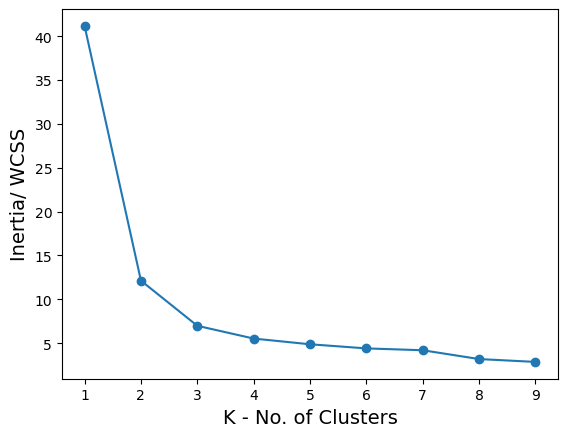

In [6]:
fig, ax = plt.subplots()
ax.plot(range(1,10), wcss_list, marker='o')
ax.set_xlabel("K - No. of Clusters", size=14)
ax.set_ylabel("Inertia/ WCSS", size=14)
plt.show()

In [7]:
model = KMeans(n_clusters=3, random_state=12)
model.fit(X)
data_in["cluster_label"] = model.predict(X)

In [8]:
data_in["cluster_label"].value_counts()

cluster_label
2    61
0    50
1    39
Name: count, dtype: int64

In [9]:
data_in.groupby(['cluster_label']).mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster_label,,,,
0,5.006000,3.428000,1.462000,0.246000
1,6.846154,3.082051,5.702564,2.079487
2,5.888525,2.737705,4.396721,1.418033


#### Silhoutte Coefficient

In [1]:
# fig, ax = plt.subplots(dpi=300, figsize=(12,8))
# plt.imshow(img.imread("./s1.png"))
# plt.show()

In [11]:
from sklearn.metrics import silhouette_score

si_scores = [] 
for k in range(2,10): 
    model = KMeans(k)
    preds = model.fit_predict(X)
    si_score = silhouette_score(X, preds)
    si_scores.append(si_score)

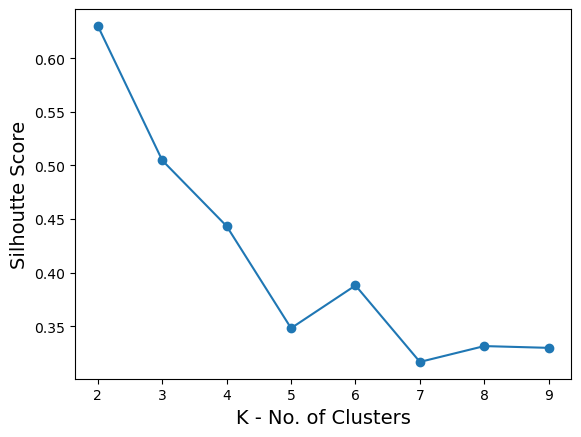

In [12]:
fig, ax = plt.subplots()
ax.plot(range(2,10), si_scores, marker='o')
ax.set_xlabel("K - No. of Clusters", size=14)
ax.set_ylabel("Silhoutte Score", size=14)
plt.show()

In [13]:
model = KMeans(n_clusters=2, random_state=12)
model.fit(X)
data_in["cluster_label"] = model.predict(X)

In [14]:
data_in["cluster_label"].value_counts() 

cluster_label
1    100
0     50
Name: count, dtype: int64